### Importaci√≥n de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [8]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categor√≠a del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de env√≠o          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificaci√≥n            2359 non-null   int64  
 8   M√©todo de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


# 1. An√°lisis de facturaci√≥n



In [9]:
#Ingreso total
ingresos_totales_tienda  = tienda['Precio'].sum()
ingresos_totales_tienda2  = tienda2['Precio'].sum()
ingresos_totales_tienda3  = tienda3['Precio'].sum()
ingresos_totales_tienda4  = tienda4['Precio'].sum()

print(f"Ingresos totales Tienda 1: ${ingresos_totales_tienda:,.2f}")
print(f"Ingresos totales Tienda 2: ${ingresos_totales_tienda2:,.2f}")
print(f"Ingresos totales Tienda 3: ${ingresos_totales_tienda3:,.2f}")
print(f"Ingresos totales Tienda 4: ${ingresos_totales_tienda4:,.2f}")


Ingresos totales Tienda 1: $1,150,880,400.00
Ingresos totales Tienda 2: $1,116,343,500.00
Ingresos totales Tienda 3: $1,098,019,600.00
Ingresos totales Tienda 4: $1,038,375,700.00


### Las tienda que m√°s facturo fue la Tienda 1
### La tienda que menos facturo fue la Tienda 4

# 2. Ventas por categor√≠a

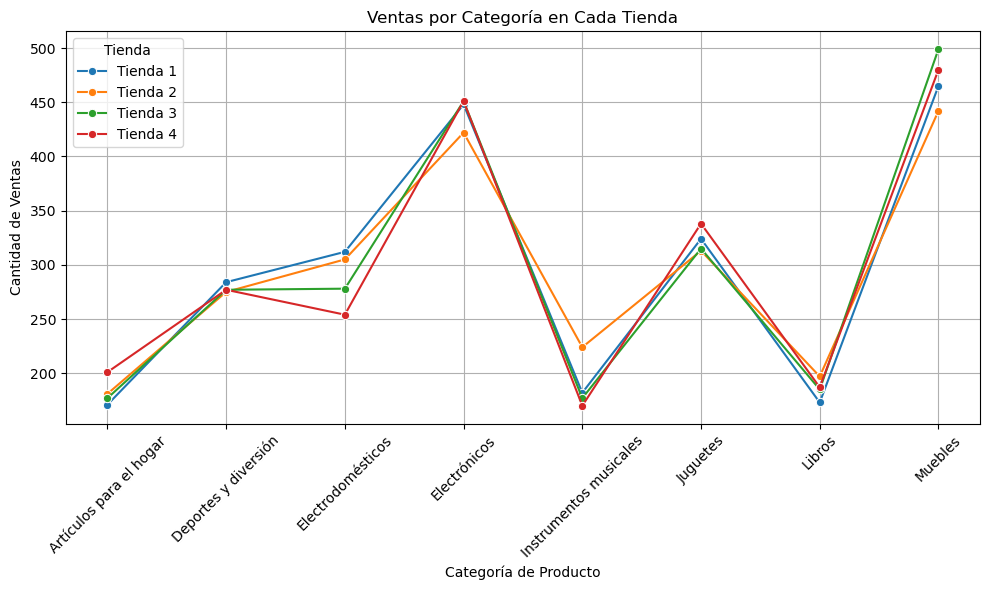

Categor√≠a del Producto  Tienda 1  Tienda 2  Tienda 3  Tienda 4
0  Art√≠culos para el hogar       171       181       177       201
1     Deportes y diversi√≥n       284       275       277       277
2        Electrodom√©sticos       312       305       278       254
3             Electr√≥nicos       448       422       451       451
4   Instrumentos musicales       182       224       177       170
5                 Juguetes       324       313       315       338
6                   Libros       173       197       185       187
7                  Muebles       465       442       499       480

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

ventas_tienda_por_categoria = tienda['Categor√≠a del Producto'].value_counts()
ventas_tienda2_por_categoria = tienda2['Categor√≠a del Producto'].value_counts()
ventas_tienda3_por_categoria = tienda3['Categor√≠a del Producto'].value_counts()
ventas_tienda4_por_categoria = tienda4['Categor√≠a del Producto'].value_counts()

df_ventas_tiendas_por_categoria = pd.DataFrame({
    'Tienda 1': ventas_tienda_por_categoria,
    'Tienda 2': ventas_tienda2_por_categoria,
    'Tienda 3': ventas_tienda3_por_categoria,
    'Tienda 4': ventas_tienda4_por_categoria
}).fillna(0).astype(int)

df_ventas_tiendas_por_categoria.reset_index(inplace=True)

df_ventas_tiendas_por_categoria.rename(columns={'index': 'Categor√≠a del Producto'}, inplace=True)

df_ventas_tiendas_por_categoria_largo = df_ventas_tiendas_por_categoria.melt(id_vars='Categor√≠a del Producto', var_name='Tienda', value_name='Ventas')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ventas_tiendas_por_categoria_largo, x='Categor√≠a del Producto', y='Ventas', hue='Tienda', marker='o')

plt.title('Ventas por Categor√≠a en Cada Tienda')
plt.xlabel('Categor√≠a de Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

df_ventas_tiendas_por_categoria

### Las categor√≠as donde hubo m√°s ventas para la tienda 1 fueron: Deportes y diversi√≥n, y Electrodom√©sticos
### La categor√≠a donde hubo m√°s ventas para la tienda 2 fueron: Electr√≥nicos
### Las categor√≠as donde hubo m√°s ventas para la tienda 3 fueron: Electr√≥nicos y Muebles
### Las categor√≠as donde hubo m√°s ventas para la tienda 4 fueron: Art√≠culos para el hogar y Juguetes

# 3. Calificaci√≥n promedio de la tienda


In [13]:
calificacion_promedio_tienda = tienda['Calificaci√≥n'].mean()
calificacion_promedio_tienda2 = tienda2['Calificaci√≥n'].mean()
calificacion_promedio_tienda3 = tienda3['Calificaci√≥n'].mean()
calificacion_promedio_tienda4 = tienda4['Calificaci√≥n'].mean()

df_calificacion_tiendas = pd.DataFrame(columns=["conteo"],data=[calificacion_promedio_tienda,
                                                calificacion_promedio_tienda2,
                                                calificacion_promedio_tienda3,
                                                calificacion_promedio_tienda4], index=["Tienda 1","Tienda 2","Tienda 3","Tienda 4"])
df_calificacion_tiendas

conteo
Tienda 1  3.976685
Tienda 2  4.037304
Tienda 3  4.048326
Tienda 4  3.995759

### La tienda mejor calificada fue la Tienda 3
### La tienda peor calificada fue la tienda 1

# 4. Productos m√°s y menos vendidos

In [14]:
#dataframe con el producto m√°s vendido para cada tienda y la cantidad vendida
productos_mas_vendidos_tienda1 = tienda['Producto'].value_counts().head(3)
productos_mas_vendidos_tienda2 = tienda2['Producto'].value_counts().head(3)
productos_mas_vendidos_tienda3 = tienda3['Producto'].value_counts().head(3)
productos_mas_vendidos_tienda4 = tienda4['Producto'].value_counts().head(3)

lista_productos_mas_vendidos_tiendas = [productos_mas_vendidos_tienda1,
                                         productos_mas_vendidos_tienda2,
                                         productos_mas_vendidos_tienda3,
                                         productos_mas_vendidos_tienda4]

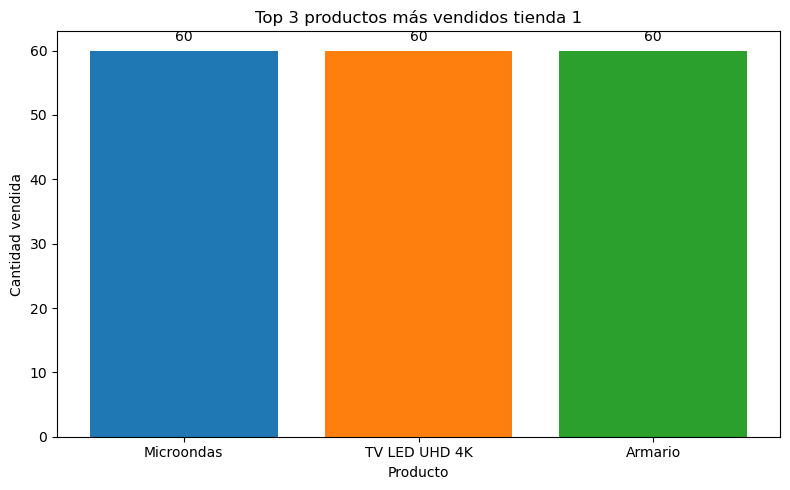

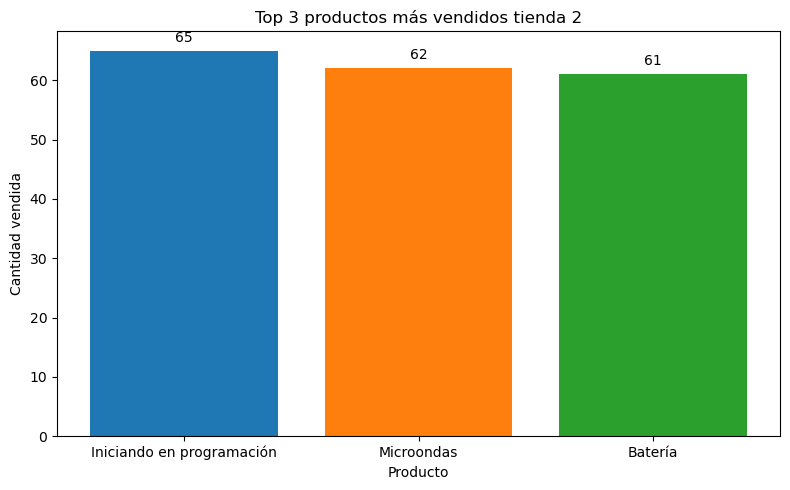

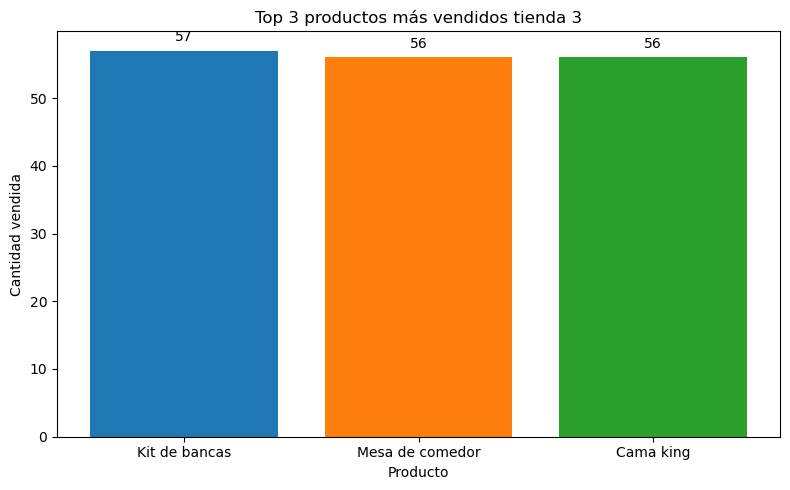

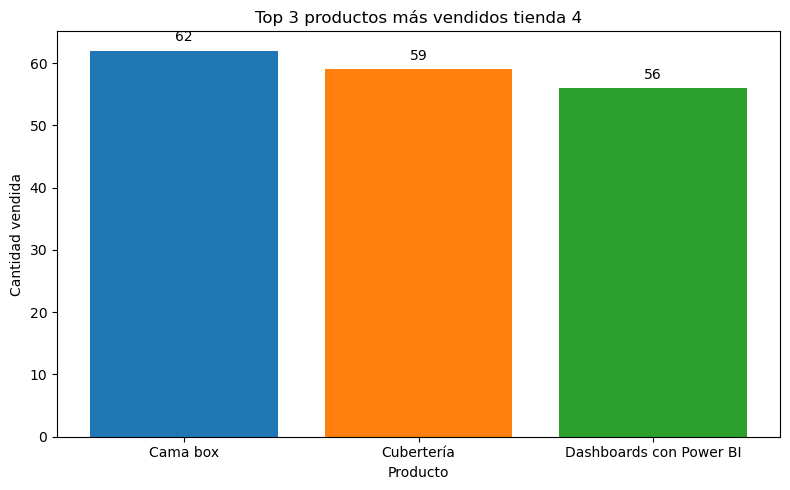

In [15]:
# Crear un gr√°fico para mostrar 
import matplotlib.pyplot as plt


# Suponiendo que ya tienes tu DataFrame df con la columna 'Producto'

# Obtener el Top 3 productos m√°s vendidos
contador = 1
for i in lista_productos_mas_vendidos_tiendas:
# Crear el gr√°fico de barras
    plt.figure(figsize=(8, 5))
    bars = plt.bar(i.index, i.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    # A√±adir etiquetas sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

    # T√≠tulos y etiquetas
    plt.title('Top 3 productos m√°s vendidos tienda ' + str(contador))
    contador += 1
    plt.xlabel('Producto')
    plt.ylabel('Cantidad vendida')
    plt.tight_layout()

    # Mostrar gr√°fico
    plt.show()




# 5. Env√≠o promedio por tienda

In [57]:
costo_envio_promedio_tienda1 = tienda['Costo de env√≠o'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de env√≠o'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de env√≠o'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de env√≠o'].mean()
df_costo_envio_tiendas = pd.DataFrame(columns=["costo_envio_promedio"], data=[costo_envio_promedio_tienda1,
                                                costo_envio_promedio_tienda2,
                                                costo_envio_promedio_tienda3,
                                                costo_envio_promedio_tienda4], index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])

df_costo_envio_tiendas

costo_envio_promedio
Tienda 1          26018.609580
Tienda 2          25216.235693
Tienda 3          24805.680373
Tienda 4          23459.457167

### La tienda con el costo de env√≠o promedio m√°s alto es la Tienda 1
### La tienda con el costo de env√≠o promedio m√°s bajo es la Tienda 4

In [69]:

total_productos_mas_vendidos_tienda1 = sum(productos_mas_vendidos_tienda1)
total_productos_mas_vendidos_tienda2 = sum(productos_mas_vendidos_tienda2)
total_productos_mas_vendidos_tienda3 = sum(productos_mas_vendidos_tienda3)
total_productos_mas_vendidos_tienda4 = sum(productos_mas_vendidos_tienda4)
df_cantidad_vendida_mas_vendidos = pd.DataFrame(columns=["Tienda"], data=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])

df_cantidad_vendida_mas_vendidos['cantidad_vendida'] = [total_productos_mas_vendidos_tienda1,
                                                         total_productos_mas_vendidos_tienda2,
                                                         total_productos_mas_vendidos_tienda3,
                                                         total_productos_mas_vendidos_tienda4]

df_cantidad_vendida_mas_vendidos['costo_envio_promedio'] = [costo_envio_promedio_tienda1,
                                                         costo_envio_promedio_tienda2,
                                                         costo_envio_promedio_tienda3,
                                                         costo_envio_promedio_tienda4]

df_cantidad_vendida_mas_vendidos['ingresos_totales_tienda'] = [ingresos_totales_tienda,
                                                         ingresos_totales_tienda2,
                                                         ingresos_totales_tienda3,
                                                         ingresos_totales_tienda4]

df_cantidad_vendida_mas_vendidos




Tienda  cantidad_vendida  costo_envio_promedio  ingresos_totales_tienda
0  Tienda 1               180          26018.609580             1.150880e+09
1  Tienda 2               188          25216.235693             1.116344e+09
2  Tienda 3               169          24805.680373             1.098020e+09
3  Tienda 4               177          23459.457167             1.038376e+09

## En la tabla anterior se puede observar la comparativa entre la cantidad vendida por el top 3 productos m√°s vendidos para cada tienda, el costo promedio por tienda y los ingresos totales de la tienda

# El siguiente gr√°fico busca comparar la relaci√≥n que hay entre el costo promedio de env√≠o VS las cantidad de ventas totales de los 3 productos m√°s vendidos para cada tienda

A su vez se muestra el total de ingresos para cada tienda, lo que permite tambi√©n observar c√≥mo el costo de env√≠o promedio y la cantidad vendida de los 3 mejores productos afecta en los ingresos totales de cada tienda.

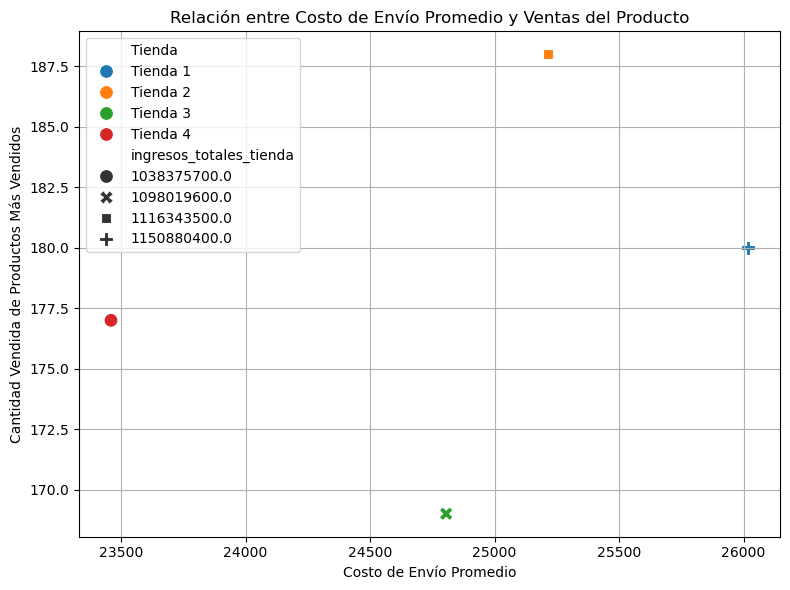

In [72]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cantidad_vendida_mas_vendidos,
    x='costo_envio_promedio',
    y='cantidad_vendida',
    hue='Tienda',
    style="ingresos_totales_tienda",  # para diferenciar por color  
    s=100  # tama√±o de los puntos
)

# Ajustes est√©ticos
plt.title('Relaci√≥n entre Costo de Env√≠o Promedio y Ventas del Producto')
plt.xlabel('Costo de Env√≠o Promedio')
plt.ylabel('Cantidad Vendida de Productos M√°s Vendidos')
plt.grid(True)
plt.tight_layout()
plt.show()

# üßæ Introducci√≥n

<p style="font-size:16px; line-height:1.6; text-align:justify;">
En el presente informe se expone un an√°lisis comparativo realizado sobre <strong>cuatro tiendas</strong>, utilizando diversos factores cuantitativos y cualitativos extra√≠dos de sus datos. <br><br>

El objetivo principal de este an√°lisis es determinar, con base en evidencia y argumentos s√≥lidos, a cu√°l de estas tiendas el cliente <strong>Juan</strong> deber√≠a vender sus productos. <br><br>

A lo largo del informe se detallar√°n los criterios evaluados y se justificar√° la recomendaci√≥n final de manera clara y sustentada.
</p>



# üìä Desarrollo del An√°lisis

<p style="font-size:16px; line-height:1.7; text-align:justify;">

Para identificar cu√°l tienda representa la mejor opci√≥n para que el cliente <strong>Juan</strong> comercialice sus productos, se realiz√≥ un an√°lisis multidimensional basado en los siguientes criterios:

<br><br>

‚úÖ <strong>1. Ingresos Totales:</strong>  
La tienda con mayor facturaci√≥n fue la <strong>Tienda 1</strong>, mientras que la de menor facturaci√≥n fue la <strong>Tienda 4</strong>. Esto puede reflejar un mayor volumen de ventas o un ticket promedio m√°s alto en la Tienda 1.

<br><br>

‚úÖ <strong>2. Categor√≠as con Mayor Demanda:</strong>  
Cada tienda muestra fortalezas distintas seg√∫n sus categor√≠as de mayor venta:
<ul>
<li><strong>Tienda 1:</strong> Deportes y diversi√≥n, Electrodom√©sticos</li>
<li><strong>Tienda 2:</strong> Electr√≥nicos</li>
<li><strong>Tienda 3:</strong> Electr√≥nicos y Muebles</li>
<li><strong>Tienda 4:</strong> Art√≠culos para el hogar y Juguetes</li>
</ul>


<br>

‚úÖ <strong>3. Calificaci√≥n Promedio:</strong>
<br>
La <strong>Tienda 3</strong> presenta la mejor valoraci√≥n por parte de los clientes, lo que podr√≠a asociarse a una mejor experiencia de usuario, atenci√≥n y log√≠stica. En contraste, la <strong>Tienda 1</strong> es la peor calificada. 

Se puede afirmar tambi√©n que la tienda 1 al tener m√°s ventas por ende tiende a tener m√°s clientes y comparando la diferencia entre las calificaciones al ser tan estrecha es posible que la calificaci√≥n de la tienda 1 se deba a la mayor√≠a de clientes que atiende.

<br>

‚úÖ <strong>4. Productos M√°s Vendidos:</strong>  
Se identificaron los tres productos m√°s vendidos por tienda. La cantidad total vendida de estos productos es un indicador del comportamiento del consumidor en cada tienda. En t√©rminos de volumen, la <strong>Tienda 3</strong> tambi√©n destaca por tener productos populares con buena rotaci√≥n.

<br><br>

‚úÖ <strong>5. Costo de Env√≠o Promedio:</strong>  
Este factor incide directamente en la decisi√≥n de compra de los usuarios. La <strong>Tienda 1</strong> tiene el env√≠o m√°s costoso, mientras que la <strong>Tienda 4</strong> presenta el env√≠o m√°s econ√≥mico. Este aspecto podr√≠a afectar la conversi√≥n en ventas, especialmente si los productos son de menor precio.

<br><br>

üìå Finalmente, se cruzaron variables como el ingreso total, costo de env√≠o y volumen de productos m√°s vendidos, revelando que:
<ul>
<li><strong>Tienda 3</strong> logra un buen equilibrio entre volumen de ventas, calificaci√≥n de clientes y desempe√±o por categor√≠a.</li>
<li><strong>Tienda 2</strong> se posiciona como una tienda especializada en electr√≥nicos, con una buena facturaci√≥n y un costo de env√≠o intermedio. Sin embargo, su calificaci√≥n de servicio no destaca, lo que podr√≠a afectar la experiencia del comprador.</li>
<li><strong>Tienda 1</strong> tiene alta facturaci√≥n, pero su bajo puntaje de calificaci√≥n y costos elevados de env√≠o podr√≠an representar una barrera.</li>
<li><strong>Tienda 4</strong> es accesible en env√≠o, pero su bajo ingreso total y categor√≠as menos populares la hacen menos competitiva.</li>
</ul>

</p>


# ‚úÖ Conclusi√≥n

<p style="font-size:16px; line-height:1.7; text-align:justify;">

Tras analizar los factores clave que afectan la decisi√≥n de comercializaci√≥n ‚Äîcomo facturaci√≥n, calificaciones, categor√≠as m√°s vendidas, costos de env√≠o y volumen de productos m√°s populares‚Äî se concluye que la <strong>Tienda 3</strong> representa la mejor opci√≥n para que el cliente <strong>Juan</strong> venda sus productos.

<br><br>

Esta recomendaci√≥n se basa en los siguientes argumentos:
<ul>
<li>Cuenta con la <strong>mejor calificaci√≥n</strong> entre todas las tiendas, lo que sugiere una experiencia de usuario satisfactoria y buena reputaci√≥n.</li>
<li>Presenta <strong>buen desempe√±o de ventas</strong> en categor√≠as clave como Electr√≥nicos y Muebles, que podr√≠an alinearse con el portafolio de Juan.</li>
<li>El volumen de productos m√°s vendidos y el ingreso generado son competitivos y muestran un <strong>balance favorable</strong> frente a los costos log√≠sticos.</li>
</ul>

En resumen, la Tienda 3 combina una alta percepci√≥n de calidad con resultados comerciales s√≥lidos, lo cual la posiciona como la opci√≥n m√°s estrat√©gica para maximizar ventas y posicionamiento de marca para el cliente.

</p>
